# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images,training_lables), (testing_images,testing_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


9


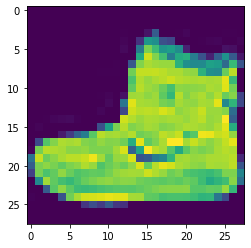

In [13]:
from matplotlib import pyplot as plt
plt.imshow(training_images[0])
print(training_lables[0])

In [14]:
# normalize values in the range of 0 - 1
training_images = training_images/255.0
testing_images = testing_images/255.0

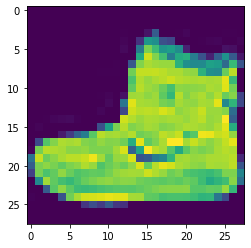

In [17]:
plt.imshow(training_images[0])

In [18]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)])

In [19]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
model.fit(training_images,training_lables,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2703 - accuracy: 0.8992
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2600 - accuracy: 0.9039
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2496 - accuracy: 0.9072
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2396 - accuracy: 0.9099
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2314 - accuracy: 0.9125
Epoch 6/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2248 - accuracy: 0.9160
Epoch 7/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2190 - accuracy: 0.9180
Epoch 8/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2118 - accuracy: 0.9209
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2066 - accuracy: 0.9230
Epoch 10/10
60

In [23]:
model.metrics_names

['loss', 'accuracy']

In [25]:
model.evaluate(testing_images,testing_labels)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3393 - accuracy: 0.8860


[0.33926920400857924, 0.886]

# Exploration Exercises

### Exercise 1:

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. 

The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [27]:
classifications = model.predict(testing_images)

print(classifications[0])

[2.9116684e-08 2.1921832e-11 5.2715884e-11 4.5139313e-12 3.6093339e-10
 1.5976471e-03 1.8241646e-09 7.1328178e-02 4.4005828e-06 9.2706972e-01]


### Exercise 2:

Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. 

What different results do you get for loss, training time etc? Why do you think that's the case?

In [46]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=1024,activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_lables,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4728 - accuracy: 0.8314
Epoch 2/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3581 - accuracy: 0.8694
Epoch 3/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3194 - accuracy: 0.8818
Epoch 4/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2965 - accuracy: 0.8895
Epoch 5/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2767 - accuracy: 0.8964
Epoch 6/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2647 - accuracy: 0.9009
Epoch 7/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2491 - accuracy: 0.9079
Epoch 8/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2404 - accuracy: 0.9095
Epoch 9/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2304 - accuracy: 0.9139
Epoch 10/15
60

In [47]:
model.evaluate(testing_images,testing_labels)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3283 - accuracy: 0.8962


[0.32830796476602553, 0.8962]

### Unnormalized version

In [48]:
(training_images,training_lables), (testing_images,testing_labels) = fashion_mnist.load_data()

In [49]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.fit(training_images,training_lables,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.7224 - accuracy: 0.7229
Epoch 2/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6524 - accuracy: 0.7452
Epoch 3/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5669 - accuracy: 0.7929
Epoch 4/15
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5345 - accuracy: 0.8123
Epoch 5/15
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5174 - accuracy: 0.8195
Epoch 6/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5039 - accuracy: 0.8251
Epoch 7/15
60000/60000 [==============================] - 2s 42us/sample - loss: 0.4930 - accuracy: 0.8286
Epoch 8/15
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4853 - accuracy: 0.8339
Epoch 9/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4874 - accuracy: 0.8311
Epoch 10/15
60

In [52]:
model.evaluate(testing_images,testing_labels)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.6424 - accuracy: 0.8161


[0.6423748174428939, 0.8161]

### Implement Callbacks

In [55]:
class myCallBacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('loss')<0.2:
            print('Loss is less thatn 0.4.Hence stopping the training')
            self.model.stop_training=True

In [57]:
mycb = myCallBacks()
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images/255.0,training_lables,epochs=100,callbacks=[mycb])

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4973 - accuracy: 0.8264
Epoch 2/100
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3773 - accuracy: 0.8635
Epoch 3/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3401 - accuracy: 0.8754
Epoch 4/100
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3154 - accuracy: 0.8842
Epoch 5/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2968 - accuracy: 0.8907
Epoch 6/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2827 - accuracy: 0.8943
Epoch 7/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2704 - accuracy: 0.8997
Epoch 8/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2592 - accuracy: 0.9034
Epoch 9/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2513 - accuracy: 0.9062
Epoch